In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_distance_histogram(
    num_points: int = 100, 
    num_distances: int = 1000, 
    dimension: int = 2
) -> None:
    """
    Generates random points in a unit hypercube of a given dimension, calculates
    a specified number of random distances between these points, and plots
    a histogram of these distances.

    Args:
        num_points (int): The number of random points to generate.
        num_distances (int): The number of random distances to calculate.
        dimension (int): The dimension of the space (e.g., 2 for a square, 
                         3 for a cube).
    """
    if dimension < 1:
        raise ValueError("Dimension must be a positive integer.")

    # --- 1. Generate Random Points in a D-dimensional Unit Hypercube ---
    # Shape will be (num_points, dimension). Each row is a point.
    points = np.random.rand(num_points, dimension)

    # --- 2. Calculate Random Distances ---
    distances = np.zeros(num_distances)
    for i in range(num_distances):
        # Choose two different random indices for the points
        idx1, idx2 = np.random.choice(num_points, 2, replace=False)
        
        # Calculate the Euclidean distance using numpy's high-performance norm function
        distance = np.linalg.norm(points[idx1] - points[idx2])
        distances[i] = distance

    # --- 3. Plot the Histogram ---
    # Determine the name of the shape for the plot title
    if dimension == 1:
        shape_name = "Unit Line"
    elif dimension == 2:
        shape_name = "Unit Square"
    elif dimension == 3:
        shape_name = "Unit Cube"
    else:
        shape_name = f"{dimension}D Unit Hypercube"

    # The maximum possible distance is the space diagonal
    max_dist = np.sqrt(dimension)

    plt.figure(figsize=(12, 7))
    plt.hist(distances, bins=50, edgecolor='black', alpha=0.8, color='cornflowerblue')

    plt.title(
        f'Distribution of {num_distances} Distances in a {shape_name}',
        fontsize=16
    )
    plt.xlabel('Euclidean Distance', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add a vertical line for the maximum possible distance for reference
    plt.axvline(
        max_dist, 
        color='red', 
        linestyle='dashed', 
        linewidth=2, 
        label=f'Max Possible Distance (√{dimension}) ≈ {max_dist:.2f}'
    )
    plt.legend()
    plt.show()




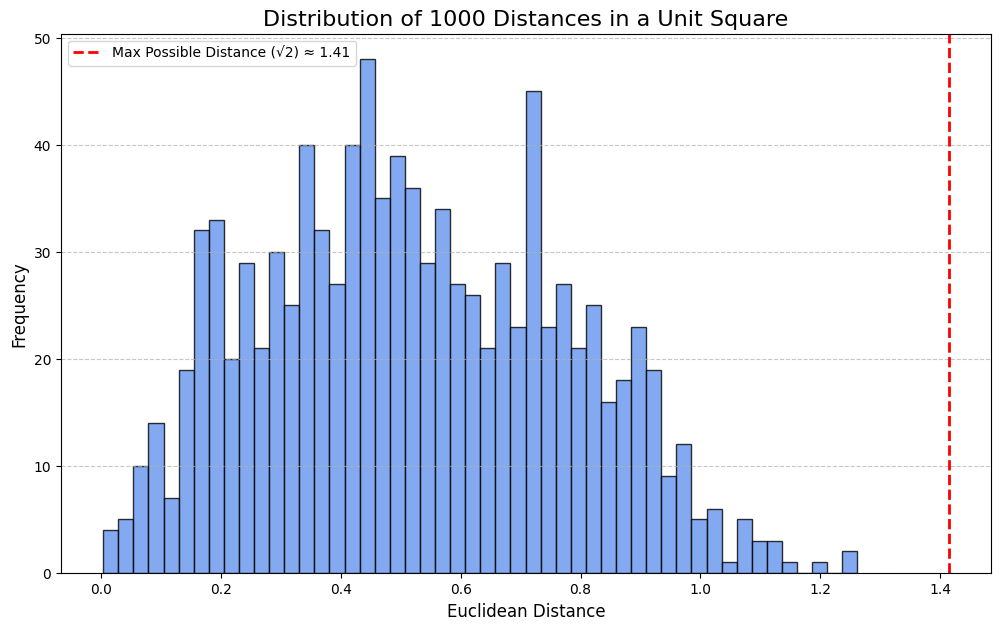

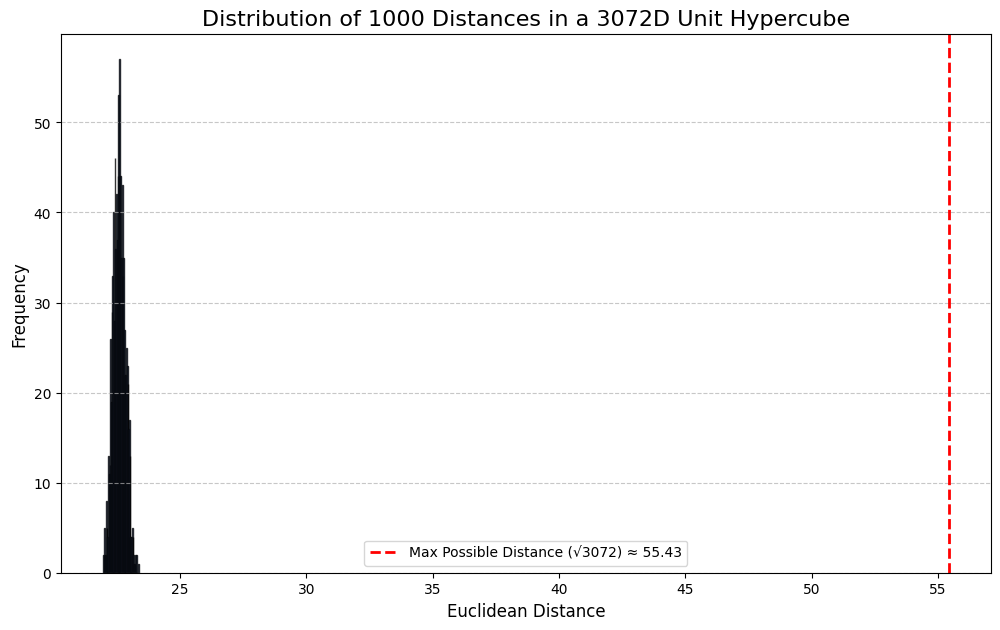

In [11]:
plot_distance_histogram(num_points=100, num_distances=1000, dimension=2);
plot_distance_histogram(num_points=100, num_distances=1000, dimension=3072);